# Punktpartikkel i 2D

### FY1003 Elektrisitet og Magnetisme - Numerisk Øving 1

Det elektriske felt og potensial for en punktpartikkel er allerede kjent i vilkårlig dimensjon. Hensikten med denne øvingen er å lære hvordan man håndterer numerikk i flere dimensjoner, både mht. de forskjellige metodene som fins for å plotte 2-dimensjonale systemer, og bruk av meshgrids. Det forventes at bruk av 1-dimensjonale arrays er kjent fra tidligere. 

### Oppgave 1: Elektrisk Potensial

Fra Coloumbs lov er det kjent at det elektriske potensialet i 2 dimensjoner en avstand, $r = \sqrt{x^2 + y^2}$, fra en punktpartikkel med ladning $q$ er gitt ved 
\begin{equation}
V(r) = \frac{q}{4\pi \epsilon_0}\frac{1}{r}\text{,}
\end{equation}
hvor $\epsilon_0$ er den elektriske permittivitet i vakum. Første del av øvingen vil gå ut på å plotte dette potensialet for en punktpartikkel med ladning $q = e$ plassert i origo, mellom $\pm L = \pm 10\text{nm}$.

$\textbf{a)}$ Ofte når man jobber med numerikk er det hensiktsmessig å innføre nye dimensjonsløse variabler, f.eks. $v/c$ hvis man jobber med hastigheter nær lysets hastighet, eller $V/V_0$ om man jobber med et konstant potensial. Utfør et slikt variabelskifte på potensialet og posisjonen slik at de blir dimensjonsløse.

------------

\begin{equation}
V_{e}=\frac{V}{V_{0}}
\end{equation}
Siden vi har likningen:
\begin{equation}
    V = V(r) = \frac{q}{4\pi \epsilon_0}\frac{1}{r}
\end{equation}
Så vil vi gjøre den dimensjonsløs.
Da definerer vi en \begin{equation*} V_{0}\end{equation*} som passer våre størrelser og deler V på \begin{equation*} V_{0}\end{equation*}
Siden vi kommer til å komme svært nær r = 0 i visualiseringen vår bruker vi r = 0.4 og regner ut V(0.4nm) for å finne ut vår \begin{equation*}V_{0} \end{equation*}
Dette finner vi ut at er:
\begin{equation}
    V_{0} = V(0.4) = 3.600 v
\end{equation}
Da får vi den endelig likningen
\begin{equation}
    V = \frac{\frac{q}{4\pi \epsilon_0}\frac{1}{r}}{3.600}
\end{equation}

----------------

$\textbf{b)}$ For å løse problemer i to dimensjoner er det nødvendig med en ny måte å diskretisere koordinatene. Det er ikke lenger tilstrekkelig med éndimensjonale $1 \times n$ arrays. Vi trenger enten en $n \times n$ array hvor hvert punkt er en 2-dimensjonal vektor, eller en separat $n \times n$ array for hver akse. I denne øvingen skal vi bruke den sistnevnte metoden, ved å bruke $\texttt{numpy}$s $\texttt{meshgrid}$ funksjon.

Bruk $\texttt{np.meshgrid}$ til å generere to variabler, $\texttt{xv}$ og $\texttt{yv}$, som inneholder $x$ og $y$ koordinater respektivt.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

L = 10*10**(-9)
n = 100
x = np.linspace(-L,L , n)
y = np.linspace(-L, L, n)

xv, yv = np.meshgrid(x, y)

$\textbf{c)}$ Via bruk av array-operasjoner, lag en variabel $\texttt{V}$ som inneholder potensialet $V$ for alle $x$ og $y$. Merk at det her vil oppstå en singularitet i $\vec{r} = 0$ som må tas stilling til. En måte å håndtere dette problemet er å sette verdien for potensialet over en viss grense lik konstant, f.eks. $\texttt{V[}>\texttt{c]} = \texttt{c}$.

In [15]:
V = np.zeros((n,n))
e = 1.60217*10**(-19)
k = 8.98755*10**9
v_0 = 3.600
             
for i in range(0,n):
    for j in range(0,n):

        xp= xv[i,j] 
        yp= yv[i,j] 
        
        if ((sqrt(xp**2+yp**2))) != 0:
            V[i,j] = e * k / np.maximum(0.5 * 10 ** (-9), np.sqrt(xp ** 2 + yp ** 2))

        else:
            V[i,j] = 3*10**9

$\textbf{d)}$ Plot det dimensjonsløse potensialet $V$ både som en heatmap og som en 3d overflate.

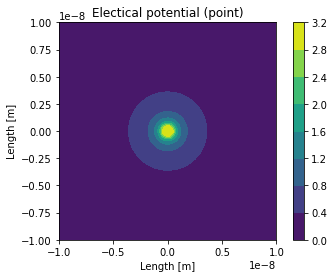

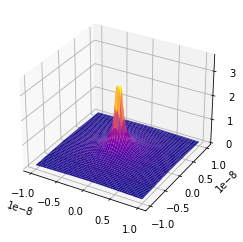

In [28]:
h = plt.contourf(xv, yv, V)
plt.axis('scaled')
plt.colorbar()
plt.title("Electical potential (point)")
plt.xlabel("Length [m]")
plt.ylabel("Length [m]")
plt.show()

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_zlim(0, v_0)
ax.plot_surface(xv, yv, V, cmap = 'plasma')

### Oppgave 2: Elektrisk Felt

Det elektriske felt for en punktpartikkel er også kjent fra Coloumbs lov, men generelt hvis man vet potensialet kan en finne det elektriske feltet ved å bruke gradienten, $\vec{E}=-\nabla V$. I én dimensjon er gradienten kun en vanlig derivert, og vi får $E(r) = -\frac{\text{d}V(r)}{\text{d}r}$. En kan beregne dette numerisk ved å diskretisere derivasjonen,
\begin{equation}
    E(r_\text{i}) = -\frac{V(r_\text{i+1})-V(r_\text{i-1})}{r_\text{i+1}-r_\text{i-1}}\text{.}
\end{equation}
Dette er et eksempel på en finite difference quotient, mer spesifikt er dette en $\textit{central finite difference quotient}$. 

$\textbf{a)}$ Utled en diskret formulering for gradienten i to dimensjoner med bruk av finite difference quotients.

----------------


\begin{equation}
    E(r_\text{i}) = -\frac{V(r_\text{i+1})-V(r_\text{i-1})}{r_\text{i+1}-r_\text{i-1}}\text{.}
\end{equation}
Kombinerer vi dette med V(r) får vi
\begin{equation}
    E = - \frac{eK}{r_{i+1} r_{i-1}}
\end{equation}

Jeg var usikker på hva jeg skulle gjøre så jeg regna også ut gradienten direkte :/

\begin{equation}
    V(r) = \frac{eK}{r} = \frac{eK}{\sqrt{x^2+y^2}}
\end{equation}
Når vi finner gradienten ved hjelp av partiellderivasjon får vi at den er:
\begin{equation}
    E = -\nabla V(r) = \frac{eK}{r^3}[x, y]
\end{equation}
Kombinerer vi dette med utrykket fra start får vi:
\begin{equation}
    E(r_{i}) = - \frac{\frac{eK}{r_{i+1}}-\frac{eK}{r_{i-1}}}{r_{i+1}-r_{i-1}}
\end{equation}


------------------

$\textbf{b)}$ Lag en funksjon som tar inn et potensial $\texttt{V}$ som argument, regner ut gradienten i hvert punkt, og returnerer det elektriske feltet som to $n-2 \times n-2$ arrays (årsaken til at dimensjonen blir $n-2$ og ikke $n$ er at man ikke kan beregne gradienten på randen med central finite differences, men må da bruke enten det som kalles forward/backward finite differences).

$\textit{Hint:}$ Bruk array slicing for å gjøre koden mer effektiv.

In [17]:
def potensial(x, y):
    return e*k / np.maximum(1, ((np.sqrt(x**2 + y**2) + 1)*(np.sqrt(x**2 + y**2) - 1)))

def gradient(x, y):
    return x*potensial(x, y), y*potensial(x, y)

n = 100

xspace = np.linspace(-n, n, 20)
yspace = np.linspace(-n, n, 20)

xgrid, ygrid = np.meshgrid(xspace, yspace)

$\textbf{c)}$ Plot det dimensjonsløse elektriske feltet til en punktpartikkel i to dimensjoner ved bruk av $\texttt{matplotlib}$s $\texttt{quiverplot}$.

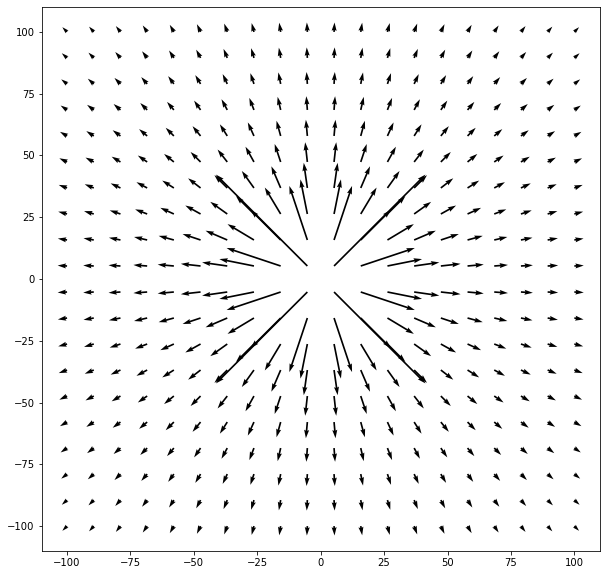

In [18]:
fig, ax = plt.subplots(figsize =(10, 10))

v = gradient(xgrid, ygrid)
ax.quiver(xspace, yspace, v[0], v[1])

plt.show()